## citation 
 - https://arbu00.blogspot.com/2017/02/7-kernel-pca.html 

In [1]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from numpy import *

### 線性不可分資料

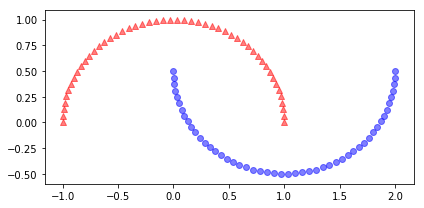

In [2]:
# SAMPLE DATA
X, y = make_moons(n_samples = 100, random_state = 111)
plt.figure(figsize=(6,3))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha = 0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha = 0.5)
plt.tight_layout()
plt.show() 

Text(0.5, 0, 'PC1')

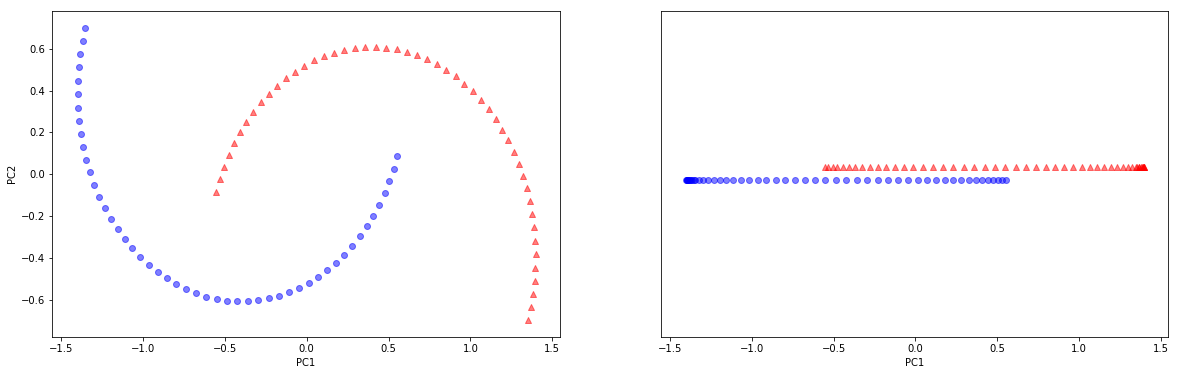

In [3]:
# APPLY NORMAL PCA
original_PCA = PCA(n_components = 2)
pca_X= original_PCA.fit_transform(X)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 6))

# axis x : principle component 1, axis y : principle component 2
ax[0].scatter(pca_X[y == 0, 0], pca_X[y == 0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(pca_X[y == 1, 0], pca_X[y == 1, 1],color='blue', marker='o', alpha=0.5)

# axis y : 0 + offset 0.2
ax[1].scatter(pca_X[y == 0, 0], np.zeros((50, 1)) + 0.02, color='red', marker='^', alpha=0.5)
# axis y : 0 - offset 0.2
ax[1].scatter(pca_X[y == 1, 0], np.zeros((50, 1)) - 0.02, color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-0.5, 0.5])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

## Kernal Method
### 定義一個非線性對應函數Φ，轉換d維空間的樣本到更高維的k維：
### e.g. 原本數據 X 有兩個特徵行向量，為2維 d = 2。利用函數 Φ 對應到3維空間 k = 3。

![avatar](https://3.bp.blogspot.com/-QyeTlcylK_Q/WLGRme9aW1I/AAAAAAAAHzs/LDFzhHAly_YpV6FSQ3hsAMn747nzTq6_ACLcB/s1600/qrbfpca2.png)

### 在此使用 RBF(Radial Basis Function Kernel)：
### 定義如下的三個步驟：

![avatar](https://2.bp.blogspot.com/-Wct_ZvPQQBg/WLGaVyAo6ZI/AAAAAAAAH0Q/DifQvsbh_IoqBvtfhUziIxHYirKopDi0ACLcB/s1600/qrbfpca.png)

In [4]:
def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.
    
    Parameters
     - X: {NumPy ndarray}, shape = [n_samples, n_features]
     - gamma: float ; Tuning parameter of the RBF kernel
     - n_components: int ; Number of principal components to return
    
    Returns
     - X_pc: {NumPy ndarray}, shape = [n_samples, k_features] ; Projected dataset   
    """
    # Calculate pairwise squared Euclidean distances in the MxN dimensional dataset.
    # Convert pairwise distances into a square matrix.
    # Compute the symmetric kernel matrix.
    K = exp( - gamma * squareform( pdist(X, 'sqeuclidean')))
    
    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.eigh returns them in sorted order 
    eigvals, eigvecs = eigh(K)
    
    # Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:, -i] for i in range(1, n_components + 1)))
    return X_pc

c:\python3.6\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


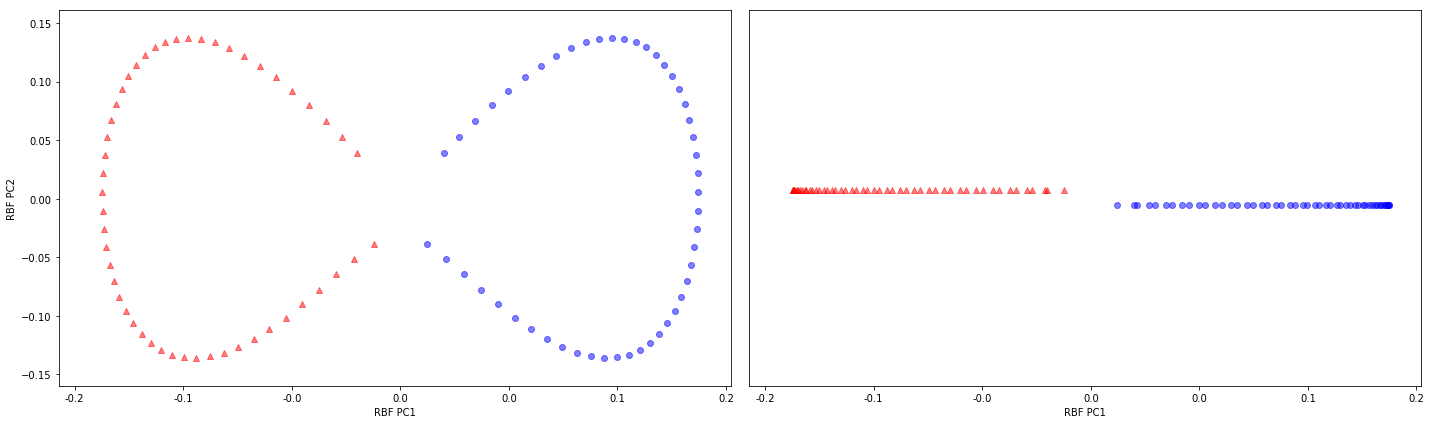

In [5]:
# APPLY RBF PCA
from matplotlib.ticker import FormatStrFormatter
kpca_X = rbf_kernel_pca(X, gamma = 15, n_components = 2)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 6))
ax[0].scatter(kpca_X[y==0, 0], kpca_X[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(kpca_X[y==1, 0], kpca_X[y==1, 1], color='blue', marker='o', alpha=0.5)

ax[1].scatter(kpca_X[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(kpca_X[y==1, 0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('RBF PC1')
ax[0].set_ylabel('RBF PC2')
ax[1].set_ylim([-0.5, 0.5])
ax[1].set_yticks([])
ax[1].set_xlabel('RBF PC1')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

plt.tight_layout()
plt.show()

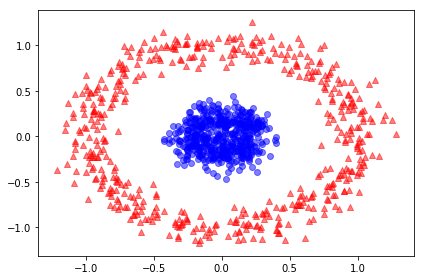

In [6]:
# SAMPLE DATA 2
from sklearn.datasets import make_circles
X, y = make_circles(n_samples = 1000, random_state = 111, noise=0.1, factor=0.2)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

c:\python3.6\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


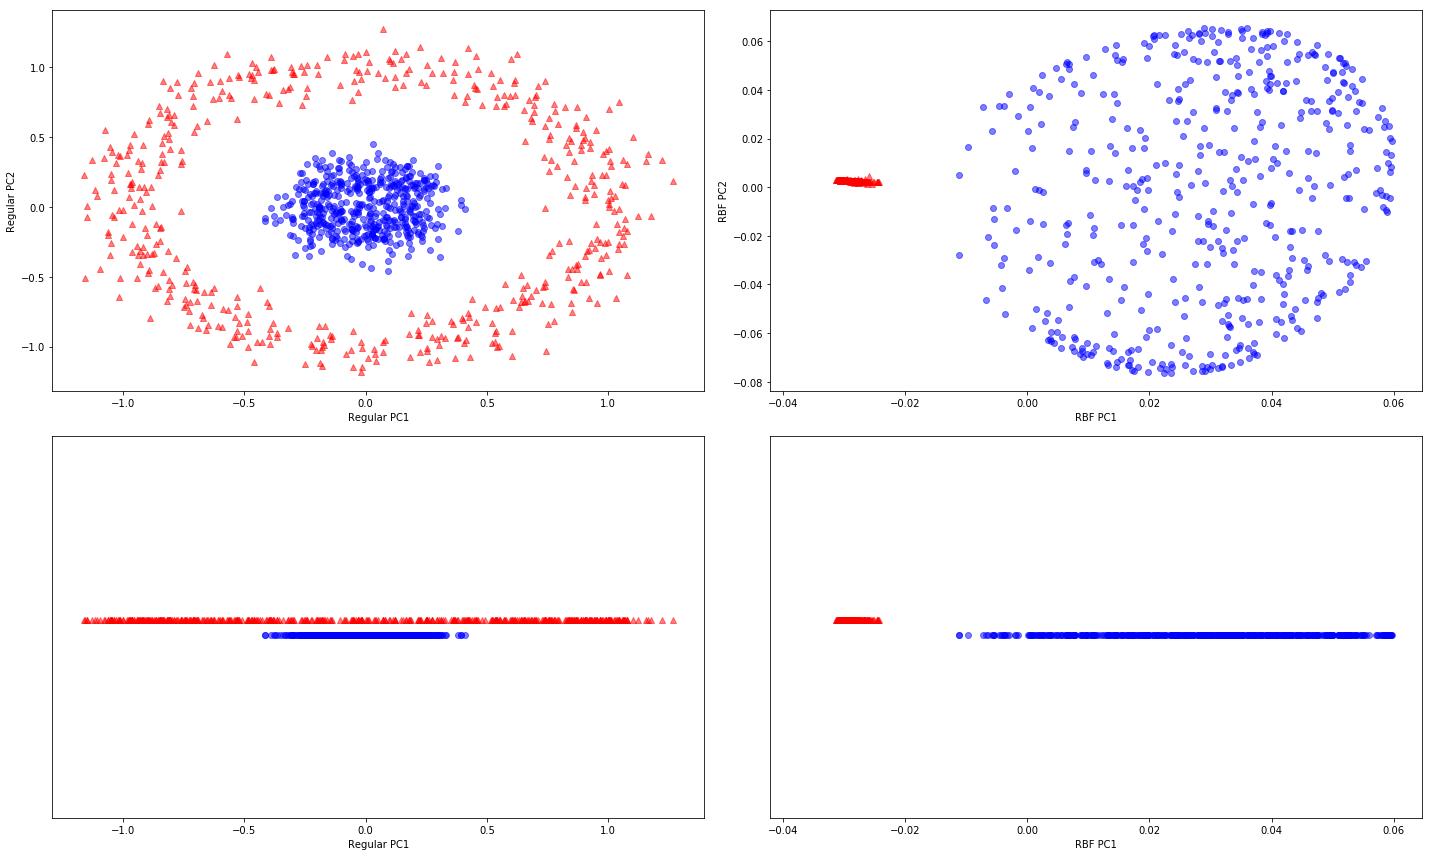

In [7]:
# APPLY NORMAL PCA
scikit_pca = PCA(n_components=2)
pca_X = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(20, 12))
ax[0][0].scatter(pca_X[y == 0, 0], pca_X[y == 0, 1], color='red', marker='^', alpha=0.5)
ax[0][0].scatter(pca_X[y == 1, 0], pca_X[y == 1, 1], color='blue', marker='o', alpha=0.5)

ax[1][0].scatter(pca_X[y == 0, 0], np.zeros((500, 1)) + 0.02,  color='red', marker='^', alpha=0.5)
ax[1][0].scatter(pca_X[y == 1, 0], np.zeros((500, 1)) - 0.02, color='blue', marker='o', alpha=0.5)

ax[0][0].set_xlabel('Regular PC1')
ax[0][0].set_ylabel('Regular PC2')

ax[1][0].set_ylim([-0.5, 0.5])
ax[1][0].set_yticks([])
ax[1][0].set_xlabel('Regular PC1')

# APPLY RBF PCA
kpca_X = rbf_kernel_pca(X, gamma=15, n_components=2)

ax[0][1].scatter(kpca_X[y == 0, 0], kpca_X[y == 0, 1], color='red', marker='^', alpha=0.5)
ax[0][1].scatter(kpca_X[y == 1, 0], kpca_X[y == 1, 1], color='blue', marker='o', alpha=0.5)

ax[1][1].scatter(kpca_X[y == 0, 0], np.zeros((500, 1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1][1].scatter(kpca_X[y == 1, 0], np.zeros((500, 1)) - 0.02, color='blue', marker='o', alpha=0.5)

ax[0][1].set_xlabel('RBF PC1')
ax[0][1].set_ylabel('RBF PC2')

ax[1][1].set_ylim([-0.5, 0.5])
ax[1][1].set_yticks([])
ax[1][1].set_xlabel('RBF PC1')

plt.tight_layout()
plt.show()